## Entrenamiento de un modelo de perceptrón con el conjunto de datos iris

In [51]:
# Importando los datos
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/'\
    'machine-learning-databases/iris/iris.data'
print('From URL:', s)

df = pd.read_csv(s, header = None, encoding = 'utf-8')
df.head()

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


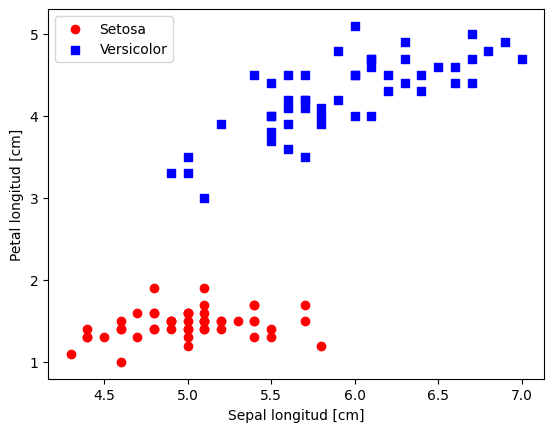

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Selección de setosa y versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)
# y

# Seleccion de longitud de sépalo y pétalo
X = df.iloc[0:100, [0,2]].values

# Creación de un gráfica
plt.scatter(X[0:50, 0], X[0:50, 1],
            color = 'red', marker = 'o', label = 'Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color = 'blue', marker = 's', label = 'Versicolor')
plt.xlabel('Sepal longitud [cm]')
plt.ylabel('Petal longitud [cm]')
plt.legend(loc = 'upper left')
plt.show()

Al observar la gráfica anterior, se puede inferir, que es suficiente para que un modelo de clasificación lineal, como el perceptrón, sea capaz de clasificar perfectamente las flores.

In [53]:
# Implementación de Perceptron
class Perceptron:
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    b_ : Scalar
      Bias unit after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_examples, n_features]
          Training vectors, where n_examples is the number of examples and
          n_features is the number of features.
        y : array-like, shape = [n_examples]
          Target values.

        Returns
        -------
        self : object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.0)

        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)


In [54]:
# from PerceptronImpl import Perceptron

# Ahora, entrenemos al modelo
ppn = Perceptron(eta = 0.1, n_iter = 10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, market = 'o')
plt.xlabel('Ciclos')
plt.ylabel("Número de actualizaciones")
plt.show()

AttributeError: `np.float_` was removed in the NumPy 2.0 release. Use `np.float64` instead.